In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import *
from IPython.display import display, HTML
import glob
import scanpy as sc
import pandas as pd
import seaborn as sns

/nfs/software/stegle/users/acuomo/conda-envs/myscanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [22]:
fig_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/main_figures/"

In [2]:
myfolder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/neuroseq_notebooks/"

In [3]:
file_df = pd.read_csv(myfolder+'/file_tracking.tsv', sep='\t', index_col=0)

file_df

,type,time_point,description,path
label,,,,
all_sample_h5,scanpy h5 file,all,Scanpy file with subsample of cells from all t...,/nfs/leia/research/stegle/dseaton/hipsci/singl...
D11_h5,scanpy h5 file,D11,scanpy file with all D11 cells,/nfs/leia/research/stegle/dseaton/hipsci/singl...
D30_h5,scanpy h5 file,D30,scanpy file with all D30 cells,/nfs/leia/research/stegle/dseaton/hipsci/singl...
D52_h5,scanpy h5 file,D52,scanpy file with all D52 cells,/nfs/leia/research/stegle/dseaton/hipsci/singl...
D11_cell_fractions,tsv,D11,"table of cell fractions for (donor_id,pool_id)...",/nfs/leia/research/stegle/dseaton/hipsci/singl...
D30_cell_fractions,tsv,D30,"table of cell fractions for (donor_id,pool_id)...",/nfs/leia/research/stegle/dseaton/hipsci/singl...
D52_cell_fractions,tsv,D52,"table of cell fractions for (donor_id,pool_id)...",/nfs/leia/research/stegle/dseaton/hipsci/singl...
diff_efficiency,tsv,D52,differentiation efficiency for each cell line,/nfs/leia/research/stegle/dseaton/hipsci/singl...
diff_trajectories,tsv,all,"all differentiation trajectories, restricted t...",/nfs/leia/research/stegle/dseaton/hipsci/singl...


In [4]:
file = file_df.loc['all_sample_h5','path']

adatafull = sc.read(file)

Only considering the two last: ['.scanpy', '.h5'].
Only considering the two last: ['.scanpy', '.h5'].


In [5]:
adatafull.obs

,batch,donor_id,log1p_n_genes_by_counts,log1p_total_counts,log1p_total_counts_mito,n_genes_by_counts,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pct_counts_in_top_50_genes,pct_counts_mito,sample_id,total_counts,total_counts_mito,cluster_id,time_point,pool_id,treatment,n_counts_all,celltype
index,,,,,,,,,,,,,,,,,,,,
TTCCCAGGTTCCATGA-1-0,0,HPSI0214i-eiwy_1,7.893572,9.321613,4.077538,2679,53.543307,63.842162,74.865784,37.687903,0.518969,5245STDY7352549,11176.0,58.0,0,D11,pool1,NONE,11176.0,FPP
AACCGCGAGGTCATCT-1-0,0,HPSI0114i-eipl_1,8.214194,9.801510,5.147494,3692,51.971207,61.666667,72.530454,37.308970,0.946844,5245STDY7352549,18060.0,171.0,1,D11,pool1,NONE,18060.0,P_FPP
TCACAAGTCTTATCTG-1-0,0,HPSI1113i-podx_1,8.319474,10.024244,5.318120,4102,51.511123,61.176106,71.900204,36.860764,0.899583,5245STDY7352549,22566.0,203.0,1,D11,pool1,NONE,22566.0,P_FPP
TACCTTACACGGTTTA-1-0,0,HPSI0614i-liqa_1,7.825245,9.297252,4.744932,2502,58.595397,67.717979,77.775740,42.917393,1.045200,5245STDY7352549,10907.0,114.0,0,D11,pool1,NONE,10907.0,FPP
CCTAGCTAGCGCCTTG-1-0,0,HPSI0114i-eipl_1,8.029433,9.451638,4.718499,3069,50.487115,60.402263,71.763042,36.635764,0.872093,5245STDY7352549,12728.0,111.0,1,D11,pool1,NONE,12728.0,P_FPP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGGCATCTCAACGCTA-1-150,150,HPSI1113i-qorq_1,8.315322,9.783182,6.086775,4085,37.074216,48.325062,63.489736,28.270923,2.475750,5245STDY8354286,17732.0,439.0,0,D52,pool17,ROT,17732.0,Sert
GGCCGATGTGTCCTCT-1-150,150,HPSI0115i-jotn_2,8.343554,9.910066,6.824374,4202,42.933784,53.519448,67.815806,34.454324,4.565098,5245STDY8354286,20131.0,919.0,0,D52,pool17,ROT,20131.0,Sert
GCGCAGTTCACGAAGG-1-150,150,HPSI0114i-vass_1,8.341649,10.012028,6.922644,4194,40.848735,51.157366,66.781805,33.316885,4.548717,5245STDY8354286,22292.0,1014.0,0,D52,pool17,ROT,22292.0,Sert


In [6]:
adatafull.obs['celltype_timepoint'] = (adatafull.obs.apply(lambda x: x['celltype']+'_'+x['time_point'], axis=1))

In [7]:
old_to_new = dict(
    DA_D52 = 'DA_D52',
    Astro_D30 = 'FPP_D30',
    DA_D30 = 'DA_D30',
    P_FPP_D11 = 'P_FPP_D11', 
    FPP_D52 = 'FPP_D52',
    Sert_D52 = 'Sert_D52',
    FPP_D11 = 'FPP_D11', 
    NB_D11 = 'NB_D11', 
    CHem_D30 = 'U_Neur1_D30', 
    P_FPP_D30 = 'P_FPP_D30',
    Epen1_D52 = 'Epen1_D52', 
    Astro_D52 = 'Astro_D52', 
    CHem_D52 = 'U_Neur1_D52', 
    Epen1_D30 = 'Epen1_D30', 
    P_FPP_D52 = 'P_FPP_D52',
    unknown_D30 = 'U_Neur2_D30', 
    Sert_D30 = 'Sert_D30', 
    Epen2_D52 = 'Epen2_D52', 
    unknown_D52 = 'U_Neur3_D52',
    P_Sert_D52 = 'P_Sert_D52'
)
adatafull.obs['celltype_timepoint_new'] = (
    adatafull.obs['celltype_timepoint']
    .map(old_to_new)
    .astype('category')
)

In [8]:
adatafull.obs['celltype_timepoint_new']

index
TTCCCAGGTTCCATGA-1-0        FPP_D11
AACCGCGAGGTCATCT-1-0      P_FPP_D11
TCACAAGTCTTATCTG-1-0      P_FPP_D11
TACCTTACACGGTTTA-1-0        FPP_D11
CCTAGCTAGCGCCTTG-1-0      P_FPP_D11
                            ...    
GGGCATCTCAACGCTA-1-150     Sert_D52
GGCCGATGTGTCCTCT-1-150     Sert_D52
GCGCAGTTCACGAAGG-1-150     Sert_D52
GCGCAGTAGGAATGGA-1-150     Sert_D52
GTCCTCATCTAACTTC-1-150       DA_D52
Name: celltype_timepoint_new, Length: 205416, dtype: category
Categories (20, object): [Astro_D52, DA_D30, DA_D52, Epen1_D30, ..., U_Neur1_D30, U_Neur1_D52, U_Neur2_D30, U_Neur3_D52]

In [9]:
old_to_new = dict(
    DA_D52 = 'DA',
    FPP_D30 = 'FPP',
    DA_D30 = 'DA',
    P_FPP_D11 = 'P_FPP', 
    FPP_D52 = 'FPP',
    Sert_D52 = 'Sert',
    FPP_D11 = 'FPP', 
    NB_D11 = 'NB', 
    U_Neur1_D30 = 'U_Neur1', 
    P_FPP_D30 = 'P_FPP',
    Epen1_D52 = 'Epen1', 
    Astro_D52 = 'Astro', 
    U_Neur1_D52 = 'U_Neur1', 
    Epen1_D30 = 'Epen1', 
    P_FPP_D52 = 'P_FPP',
    U_Neur2_D30 = 'U_Neur2', 
    Sert_D30 = 'Sert', 
    Epen2_D52 = 'Epen2', 
    U_Neur3_D52 = 'U_Neur3',
    P_Sert_D52 = 'P_Sert'
)
adatafull.obs['celltype_new'] = (
    adatafull.obs['celltype_timepoint_new']
    .map(old_to_new)
    .astype('category')
)

In [10]:
adatafull.obs['celltype_new']

index
TTCCCAGGTTCCATGA-1-0        FPP
AACCGCGAGGTCATCT-1-0      P_FPP
TCACAAGTCTTATCTG-1-0      P_FPP
TACCTTACACGGTTTA-1-0        FPP
CCTAGCTAGCGCCTTG-1-0      P_FPP
                          ...  
GGGCATCTCAACGCTA-1-150     Sert
GGCCGATGTGTCCTCT-1-150     Sert
GCGCAGTTCACGAAGG-1-150     Sert
GCGCAGTAGGAATGGA-1-150     Sert
GTCCTCATCTAACTTC-1-150       DA
Name: celltype_new, Length: 205416, dtype: category
Categories (12, object): [Astro, DA, Epen1, Epen2, ..., Sert, U_Neur1, U_Neur2, U_Neur3]

In [11]:
# adatafull.obs.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/scanpy/neuroseq_metadata_all.txt",sep = "\t")

In [12]:
adatafull.n_obs

205416

In [13]:
adatafull.obs.head()

,batch,donor_id,log1p_n_genes_by_counts,log1p_total_counts,log1p_total_counts_mito,n_genes_by_counts,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pct_counts_in_top_50_genes,...,total_counts_mito,cluster_id,time_point,pool_id,treatment,n_counts_all,celltype,celltype_timepoint,celltype_timepoint_new,celltype_new
index,,,,,,,,,,,,,,,,,,,,,
TTCCCAGGTTCCATGA-1-0,0,HPSI0214i-eiwy_1,7.893572,9.321613,4.077538,2679,53.543307,63.842162,74.865784,37.687903,...,58.0,0,D11,pool1,NONE,11176.0,FPP,FPP_D11,FPP_D11,FPP
AACCGCGAGGTCATCT-1-0,0,HPSI0114i-eipl_1,8.214194,9.801510,5.147494,3692,51.971207,61.666667,72.530454,37.308970,...,171.0,1,D11,pool1,NONE,18060.0,P_FPP,P_FPP_D11,P_FPP_D11,P_FPP
TCACAAGTCTTATCTG-1-0,0,HPSI1113i-podx_1,8.319474,10.024244,5.318120,4102,51.511123,61.176106,71.900204,36.860764,...,203.0,1,D11,pool1,NONE,22566.0,P_FPP,P_FPP_D11,P_FPP_D11,P_FPP
TACCTTACACGGTTTA-1-0,0,HPSI0614i-liqa_1,7.825245,9.297252,4.744932,2502,58.595397,67.717979,77.775740,42.917393,...,114.0,0,D11,pool1,NONE,10907.0,FPP,FPP_D11,FPP_D11,FPP
CCTAGCTAGCGCCTTG-1-0,0,HPSI0114i-eipl_1,8.029433,9.451638,4.718499,3069,50.487115,60.402263,71.763042,36.635764,...,111.0,1,D11,pool1,NONE,12728.0,P_FPP,P_FPP_D11,P_FPP_D11,P_FPP


In [14]:
# subsample
fraction = 1
adata = sc.pp.subsample(adatafull, fraction, copy=True)

In [15]:
adata.n_obs

205416

In [16]:
adata.obs

,batch,donor_id,log1p_n_genes_by_counts,log1p_total_counts,log1p_total_counts_mito,n_genes_by_counts,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pct_counts_in_top_50_genes,...,total_counts_mito,cluster_id,time_point,pool_id,treatment,n_counts_all,celltype,celltype_timepoint,celltype_timepoint_new,celltype_new
index,,,,,,,,,,,,,,,,,,,,,
ATCGAGTTCAAACGGG-1-60,60,HPSI0514i-fiaj_1,8.347827,9.487972,5.998937,4220,29.721949,38.366543,53.488901,22.880521,...,402.0,3,D52,pool5,NONE,13199.0,DA,DA_D52,DA_D52,DA
ACCAGTAAGACCTAGG-1-81,81,HPSI0115i-aoxv_1,8.043984,9.088625,5.181784,3114,34.745284,45.882752,60.747769,24.082232,...,177.0,1,D30,pool8,NONE,8853.0,Astro,Astro_D30,FPP_D30,FPP
GCTGCAGCAACCGCCA-1-46,46,HPSI0214i-poih_2,6.579251,7.176255,2.890372,719,44.070390,59.831676,83.244070,31.752104,...,17.0,0,D30,pool5,NONE,1307.0,DA,DA_D30,DA_D30,DA
AACTCCCTCGACAGCC-1-66,66,HPSI0414i-mita_1,7.980024,9.723763,5.087596,2921,58.686935,68.406248,78.795859,42.617751,...,161.0,1,D11,pool6,NONE,16709.0,P_FPP,P_FPP_D11,P_FPP_D11,P_FPP
CGTCCATGTAGGCTGA-1-53,53,HPSI0115i-paim_1,7.807103,9.137662,4.969813,2457,52.645730,61.916541,74.166487,38.137234,...,143.0,4,D52,pool1,NONE,9298.0,FPP,FPP_D52,FPP_D52,FPP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTTAGTCTTCGGTC-1-123,123,HPSI0513i-sucd_3,6.546785,6.841616,4.499810,696,35.828877,46.951872,79.037433,25.133690,...,89.0,0,D11,pool11,NONE,935.0,FPP,FPP_D11,FPP_D11,FPP
TGAGGGAGTACCCAAT-1-79,79,HPSI0414i-mita_1,8.063378,9.085910,5.105946,3175,36.787858,46.777665,60.380564,26.446936,...,164.0,1,D30,pool6,NONE,8829.0,Astro,Astro_D30,FPP_D30,FPP
TCAGATGCATGACGGA-1-120,120,HPSI1113i-hayt_3,7.909122,9.296977,5.442418,2721,50.091709,60.409024,72.551357,37.133162,...,230.0,4,D52,pool9,ROT,10904.0,FPP,FPP_D52,FPP_D52,FPP


In [17]:
adata.n_vars

32738

In [27]:
# fig_format = 'png'
fig_format = 'pdf'
sc.set_figure_params(dpi_save=300,format=fig_format)
#rcParams['figure.figsize'] = 5,4
rcParams['figure.figsize'] = 5,4

plotting_fcn = sc.pl.umap
sc.settings.figdir = fig_folder

In [19]:
from matplotlib import cm, colors

vega_20 = list(map(colors.to_hex, cm.tab20.colors))

# specify a color map, then turn this into a palette for each time_point
# will depending on the order of the celltypes, I think.

color_dict = dict()

celltype_list = ['P_FPP','FPP','NB','DA','Sert','Astro','Epen1','P_Sert','Epen2','U_Neur1','U_Neur2','U_Neur3']
palette = [vega_20[idx] for idx in range(len(celltype_list))]

In [20]:
celltype_list = ['P_FPP','FPP','NB','DA','Sert','Astro','Epen1','P_Sert','Epen2','U_Neur1','U_Neur2','U_Neur3','other']
cat_type = pd.CategoricalDtype(categories = celltype_list, ordered=True)


for time_point in ['D11','D30','D52']:
    column = 'celltype_new_{}'.format(time_point)
    adata.obs[column] = (adata.obs
                         .apply(lambda x: x['celltype_new'] if x['time_point']==time_point else 'other', axis=1)
                         .astype(cat_type))


In [21]:
# Astro:8, DA:4, Epen1:7, Epen2:9, FPP:1, NB:2, P_FPP:0, P_Sert:10, Sert:5, U_Neur1:3, U_Neur2:6, U_Neur3:11
palette = [vega_20[idx] for idx in range(len(celltype_list))]
myorder1 = [0,1,2,4,5,8,7,10,9,3,6,11,12]
mypalette1 = [palette[i] for i in myorder1]
mypalette1[-1] = 'lightgrey'

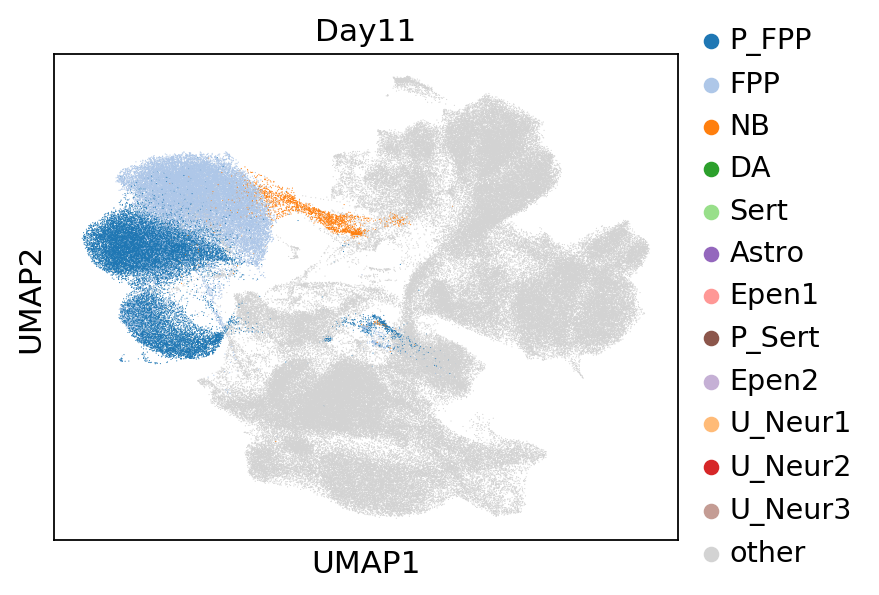

In [28]:
time_point = 'D11'
column = 'celltype_new_{}'.format(time_point)
plotting_fcn(adata, color=column, palette=mypalette1,title='Day11', size=1, save = "Fig_1b_day11.pdf")

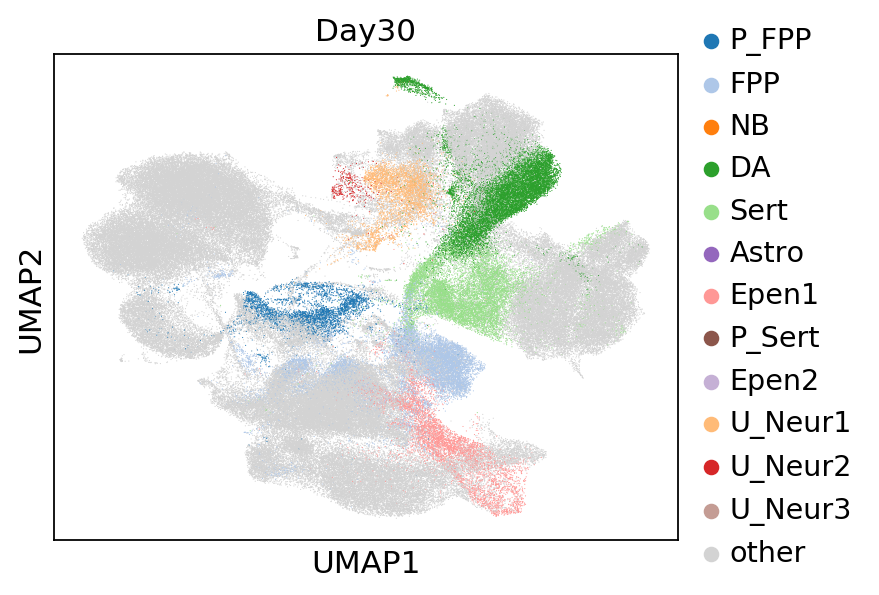

In [29]:
time_point = 'D30'
column = 'celltype_new_{}'.format(time_point)
plotting_fcn(adata, color=column, palette=mypalette1,title='Day30', size=1, save = "Fig_1b_day30.pdf")

In [30]:
for treatment in ['NONE','ROT']:
    column = 'celltype_new_D52_{}'.format(treatment)
    adata.obs[column] = (adata.obs
                         .apply(lambda x: x['celltype_new'] if x['time_point']=='D52' and x['treatment'] == treatment else 'other', axis=1)
                         .astype(cat_type))

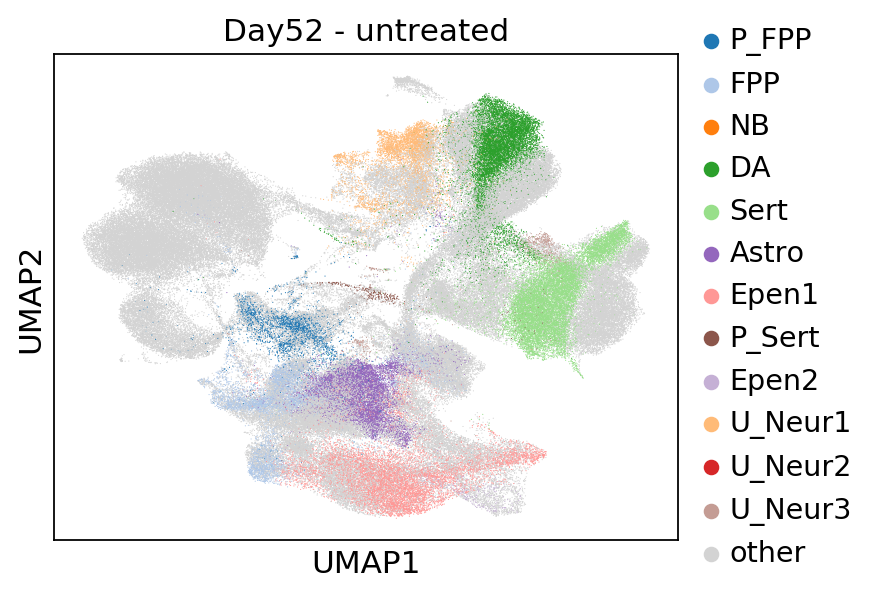

In [32]:
treatment = 'NONE'
column = 'celltype_new_D52_{}'.format(treatment)
plotting_fcn(adata, color=column, palette=mypalette1,title='Day52 - untreated', size=1, save = "Fig_1b_day52_untreated.pdf")

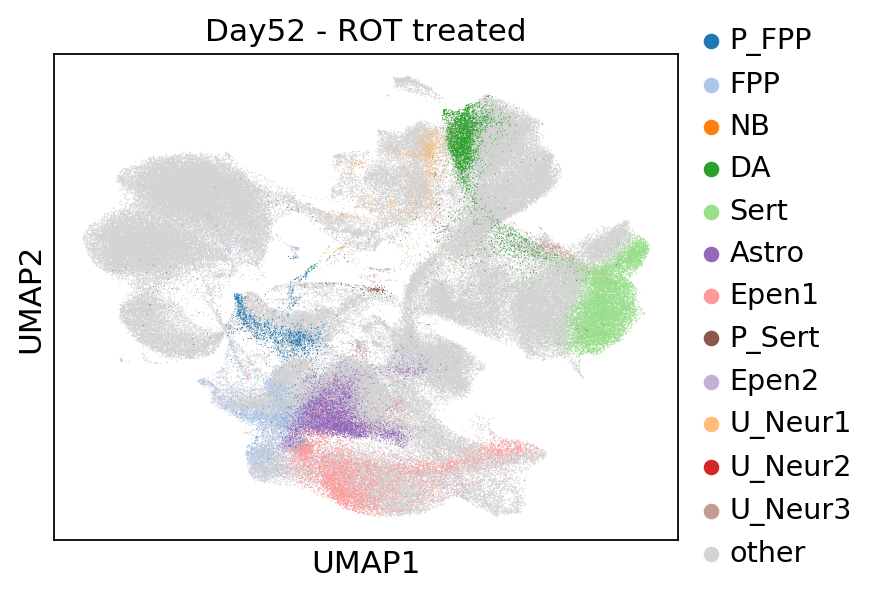

In [33]:
treatment = 'ROT'
column = 'celltype_new_D52_{}'.format(treatment)
plotting_fcn(adata, color=column, palette=mypalette1,title='Day52 - ROT treated', size=1, save = "Fig_1b_day52_ROT_treated.pdf")